In [28]:
# Section 1
# Imports
from __future__ import print_function
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
np.random.seed(0)
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [5]:
# Section 2
# Settings
batch_size = 128
num_classes = 10
epochs = 20
loss = 'categorical_crossentropy'
optimizer = RMSprop()
metrics = ['accuracy']

In [89]:
# Section 3
# Prepare train and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## change total number
x_train = x_train[range(5000)]
y_train = y_train[range(5000)]
x_test = x_test[range(1000)]
y_test = y_test[range(1000)]

## pre-process
x_train = x_train.reshape(5000, 784)
x_test = x_test.reshape(1000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## show number of train and test sets
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

5000 train samples
1000 test samples


9 input examples for train and test
Train label : [5 0 4 1 9 2 1 3 1]
Test label : [7 2 1 0 4 1 4 9 5]


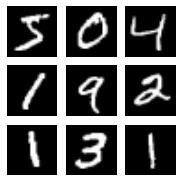

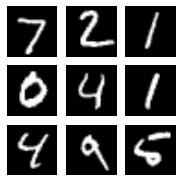

In [90]:
# Section 4
# Check train and test data
## label check
print('9 input examples for train and test')
print('Train label :', y_train[range(9)].argmax(1))
print('Test label :', y_test[range(9)].argmax(1))

## plot images
fig = plt.figure(figsize=(3, 3))
for i in range(9):
    fig_sub = fig.add_subplot(3, 3, i+1, xticks=[], yticks=[])
    fig_sub.imshow(x_train[i].reshape((28,28)), cmap='gray')

fig = plt.figure(figsize=(3, 3))
for i in range(9):
    fig_sub = fig.add_subplot(3, 3, i+1, xticks=[], yticks=[])
    fig_sub.imshow(x_test[i].reshape((28,28)), cmap='gray')

In [91]:
# Section 5
# Model definition
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

## show model structure
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_29 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_30 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [92]:
# Section 6
# Train model
## set training options
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,  validation_data=(x_test, y_test))

Train on 5000 samples, validate on 1000 samples
Epoch 1/20
5000/5000 [==============================] - 1s - loss: 0.6948 - acc: 0.7792 - val_loss: 0.8645 - val_acc: 0.7540
Epoch 2/20
5000/5000 [==============================] - 1s - loss: 0.2604 - acc: 0.9196 - val_loss: 0.7998 - val_acc: 0.7500
Epoch 3/20
5000/5000 [==============================] - 1s - loss: 0.1815 - acc: 0.9478 - val_loss: 0.3634 - val_acc: 0.8860
Epoch 4/20
5000/5000 [==============================] - 1s - loss: 0.1134 - acc: 0.9670 - val_loss: 0.4743 - val_acc: 0.8450
Epoch 5/20
5000/5000 [==============================] - 1s - loss: 0.0756 - acc: 0.9756 - val_loss: 0.4019 - val_acc: 0.8840
Epoch 6/20
5000/5000 [==============================] - 1s - loss: 0.0521 - acc: 0.9846 - val_loss: 0.2549 - val_acc: 0.9230
Epoch 7/20
5000/5000 [==============================] - 1s - loss: 0.0420 - acc: 0.9874 - val_loss: 0.2115 - val_acc: 0.9300
Epoch 8/20
5000/5000 [==============================] - 1s - loss: 0.0331 - a

In [93]:
# Section 7
# Check accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1]*100, '％ correct.')

Test accuracy: 93.9 ％ correct.


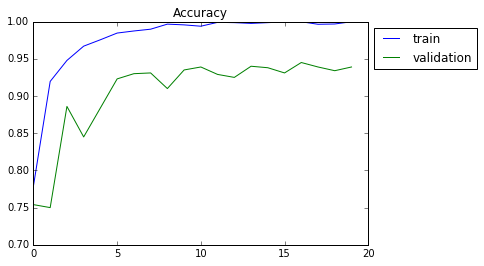

In [94]:
# Section 8
# Plot graph
x = range(20)
plt.plot(x, history.history['acc'], label='train')
plt.plot(x, history.history['val_acc'], label='validation')
plt.title('Accuracy')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()